# Complete Regression - Lab

## Introduction
By now, you have created all the necessary functions to calculate the slope, intercept, best-fit line, prediction and visualizations. In this lab you will put them all together to run a regression experiment and calculate the model loss. 

## Objectives

You will be able to:

* Run a complete regression analysis using python

## The formulas

**Slope**: 
$\hat m = \dfrac{\overline{x}*\overline{y}-\overline{xy}}{(\overline{x})^2-\overline{x^2}}$


**Intercept**: $ \hat c = \bar{y} - \hat m\bar{x}$

**Prediction**: $\hat{y} = \hat mx + \hat c$

**R-Squared**: 
$ R^2 = 1- \dfrac{SS_{RES}}{SS_{TOT}} = \dfrac{\sum_i(y_i - \hat y_i)^2}{\sum_i(y_i - \overline y_i)^2} $


Use the python functions created earlier to implement these formulas to run a regression analysis using x and y as input variables. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
# Combine all the functions created so far to run a complete regression experiment. 
# Produce an output similar to the one shown below. 

X = np.array([1,2,3,4,5,6,7,8,9,10], dtype=np.float64)
Y = np.array([7,7,8,9,9,10,10,11,11,12], dtype=np.float64)


Basic Regression Diagnostics
----------------------------
Slope: 0.56
Y-Intercept: 6.33
R-Squared: 0.97
----------------------------
Model: Y = 0.56 * X + 6.33


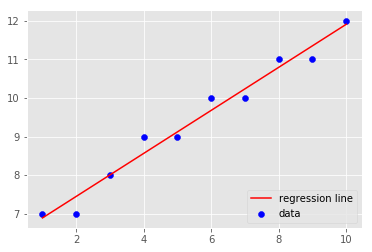

In [2]:
def slope(x,y):
    m = (np.mean(x)*np.mean(y) - np.mean(x*y)) / (np.mean(x)**2 - np.mean(x**2))
    return m

def best_fit(x,y):
    m = slope(x,y)
    c = np.mean(y) - m*np.mean(x)
    return m, c

def reg_line(x,y):
    m, c = best_fit(x,y)
    y_hat = [m*xi + c for xi in x]
    return y_hat

def r_squared(x,y):
    ss_res = 0
    ss_tot = 0
    y_hat = reg_line(x,y)
    for i in range(len(y)):
        ss_res += (y[i]- y_hat[i])**2
        ss_tot += (y[i] - np.mean(y))**2

    r_sq = 1 - ss_res / ss_tot
    return r_sq
    
def linear_model(x,y):
    m,c = best_fit(x,y)
    y_hat = reg_line(x,y)
    r_sq = r_squared(x,y)
    return m, c, y_hat, r_sq

def linear_model_output(x,y):
    m, c, y_hat, r_sq = linear_model(x,y)
    print('Basic Regression Diagnostics')
    print('----------------------------')
    print('Slope: ' + str(np.round(m,2)))
    print('Y-Intercept: ' + str(np.round(c, 2)))
    print('R-Squared: ' + str(np.round(r_sq, 2)))
    print('----------------------------')
    print(f'Model: Y = {np.round(m,2)} * X + {np.round(c,2)}')
    
def linear_model_plot(x,y):
    m, c, y_hat, r_sq = linear_model(x,y)
    plt.scatter(x, y, color='b', label='data')
    plt.plot(x, y_hat, color='r', label='regression line')
    plt.legend(loc=4)
    plt.show()
    
linear_model_output(X,Y)
linear_model_plot(X,Y)

In [3]:
# Basic Regression Diagnostics
# ----------------------------
# Slope: 0.56
# Y-Intercept: 6.33
# R-Squared: 0.97
# ----------------------------
# Model: Y = 0.56 * X + 6.33

## Make Predictions

Predict and plot the value of y using regression line above for a new value of $x = 4.5$.

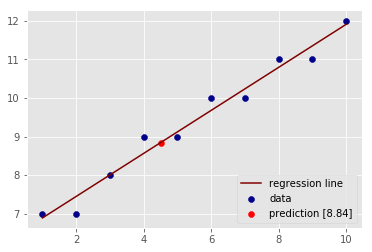

In [4]:
# Make prediction using given value and visualize on the scatter plot
def linear_model_predict(x, y, x_new):
    m, c, y_hat, r_sq = linear_model(x,y)
    y_new = [m*xi + c for xi in x_new]

    plt.scatter(x, y, color='darkblue', label='data')
    plt.plot(x, y_hat, color='maroon', label='regression line')
    plt.scatter(x_new, y_new, color='r', label='prediction '+str(np.round(y_new,2)))
    plt.legend(loc=4)
    plt.show()
    
linear_model_predict(X,Y, [4.5])

## Level up - Optional 
Load the "`heightweight.csv`" dataset. Use the height as an independent and weight as a dependent variable and draw a regression line to data using your code above. Calculate your R-Squared value for the model and try to predict new values of y. 

## Summary

In this lab, we ran a complete simple regression analysis experiment using functions created so far. Next up, you'll learn how you can use python's built-in modules to perform similar analyses with a much higher level of sophistication. 

In [5]:
import pandas as pd
df = pd.read_csv('heightWeight.csv')
df.head()

,height,weight
0,68,165
1,71,201
2,61,140
3,69,170
4,71,192


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
height    20 non-null int64
weight    20 non-null int64
dtypes: int64(2)
memory usage: 400.0 bytes


Basic Regression Diagnostics
----------------------------
Slope: 5.54
Y-Intercept: -204.48
R-Squared: 0.96
----------------------------
Model: Y = 5.54 * X + -204.48


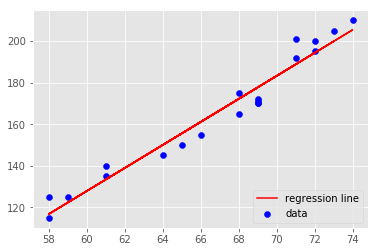

In [7]:
linear_model_output(df['height'], df['weight'])
linear_model_plot(df['height'], df['weight'])

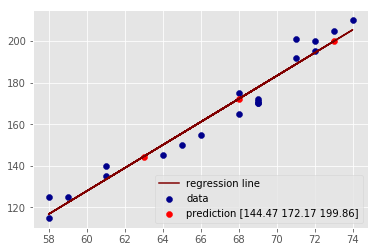

In [8]:
linear_model_predict(df['height'],df['weight'], [63, 68, 73])